In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
yolo = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [4]:
classes = []

with open("coco.names", 'r') as f:
    classes = f.read().splitlines()

In [5]:
len(classes)

80

In [6]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
img = cv2.imread("dog.jpg")

height,width, _ = img.shape
#passing image read in bgr swapRB to interchange rg and b no crop of image
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0) ,swapRB=True, crop=False)

(1, 3, 320, 320)

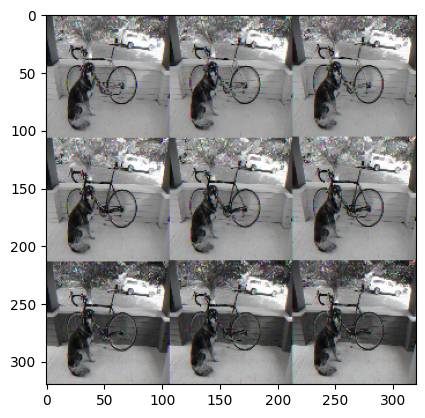

In [8]:
i = blob[0].reshape(320, 320,3)
plt.imshow(i)
blob.shape

In [9]:
#set image as input
yolo.setInput(blob)

In [10]:
#define output layers
output_layes_name = yolo.getUnconnectedOutLayersNames()
#passing output layer names
layeroutput = yolo.forward(output_layes_name)

In [11]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]  
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.95:          #threshold
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)
        
            x = int(center_x - w/2)
            y = int(center_x - h/2)
        
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
           

In [12]:
len(boxes)

5

In [13]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [14]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size = (len(boxes),3))

In [15]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i],2))
    color = colors[i]
    
    cv2.rectangle(img, (x,y),(x+w, y+h), color, 2)
    cv2.putText(img, label + "" +confi, (x,y+20),font, 2, (255,255,255), 2)

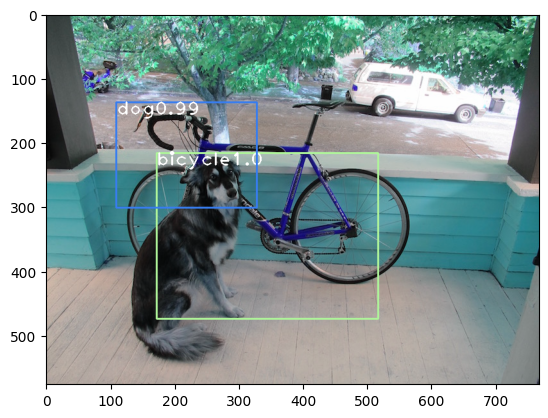

In [16]:
plt.imshow(img)